# DEEP LEARNING FIRST TRAINED MODEL

# Loading mnist dataset

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [2]:
from tensorflow import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Training data and testing data length and shape:

In [3]:
print("training data ", len(train_images), len(train_labels))
print("training datashape", train_images.shape,train_labels.shape)

training data  60000 60000
training datashape (60000, 28, 28) (60000,)


In [4]:
print("testing data ", len(test_images), len(test_labels))
print("testing datashape", test_images.shape,test_labels.shape)

testing data  10000 10000
testing datashape (10000, 28, 28) (10000,)


In [5]:
import matplotlib.pyplot as plt

# showing an image from dataset:

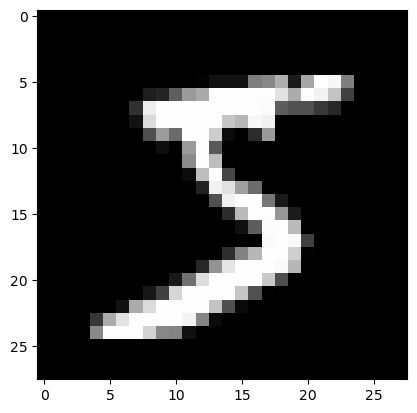

lable of img is  5


In [6]:
plt.imshow(train_images[0], cmap='gray')
plt.show()
print("lable of img is ", train_labels[0])

# The network architecture:

there are two types of architecture/model of neural network:<br>
__Sequential__ <br>
__Functional__ <br>

Models are made up of many layers. These are also called machine learning agent 

In [7]:
from keras import models

In [8]:
from keras import layers

__from model we import sequential model__ <br>
__from layers we will import densly connected layer__ <br>

__activation function__ will apply on every node of each layer.To convert linearilty of data to non-linearity<br>

# Densed Layers 
## LAYER 1:<br>
we have to tell 1st layer below three things:<br>
- output
- activation fuction
- input that comes in each layer

## LAYER 2:<br>
we have to tell 2nd layer below two things:<br>
- output (we have to tell)
- activation fuction(we have to tell)
- input(output of 1st layer become its input)

1st layer input correlate with your input<br>
last layer input correlate with each unique class in dataset<br>

relu function will make -ve value to zero and pass +ve value to next layer<br>

softmax will gave each index or lable or class probabilty , those class that have higher probability will become output(answer)<br>


In [9]:
network = models.Sequential() ## here network become agent
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
 # 512 is the hyperparameter we gave to model(it will be output of first layer)
 # relu is the activation function  + means pass - mean 0
 # input_shape is the size of each given picture

 



# The compilation step:

In [10]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
# input , output and loss function are very important in DL

# Preparing the image data

- DL have dtype called tensor
- tensor take values in float dtype 
- each scalar in tensor is in float dtype with range btw 0 to 255
- 

In [11]:
train_images = train_images.reshape((60000, 28 * 28)) # reshape img from 3d to 2d
train_images = train_images.astype('float32') / 255 # normalizing values in range btw 0 to 1

test_images = test_images.reshape((10000, 28 * 28)) # reshape img from 3d to 2d
test_images = test_images.astype('float32') / 255 # normalizing values in range btw 0 to 1

In [12]:
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

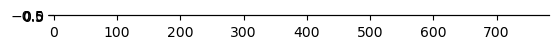

lable of img is  [5]


In [13]:
plt.imshow(train_images[[0]], cmap='gray')
plt.show()
print("lable of img is ", train_labels[[0]])

# Converting Labels in One Hot Encode:

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Train the Network:

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2631 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1070 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0707 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0509 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0380 - accuracy: 0.9885


# Accuracy: 

In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9778
test_acc: 0.9778000116348267
